In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

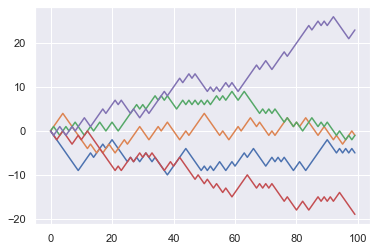

In [2]:
def make_walk(length=50, n=5, start_value=0, seed=None):
    np.random.seed(seed)
    s = 2 * np.random.randint(0, 1 + 1, (length, n)) - 1
    s[0, :] = 0
    return np.cumsum(s, axis=0) + start_value
    
plt.plot(make_walk(100, seed=None))

In [3]:
from midiutil import MIDIFile
from music21 import midi

fname = "major-scale.mid"

degrees  = [60, 62, 64, 65, 67, 69, 71, 72]  # MIDI note number
track    = 0
channel  = 0
time     = 0    # In beats
duration = 1    # In beats
tempo    = 174  # In BPM
volume   = 100  # 0-127, as per the MIDI standard

mf = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
mf.addTempo(track, time, tempo)

for i, pitch in enumerate(degrees):
    mf.addNote(track, channel, pitch, time + i, duration, volume)

with open(fname, "wb") as output_file:
    mf.writeFile(output_file)
    

s = midi.translate.midiFilePathToStream(fname)
s.show("midi")

In [19]:
from midiutil import MIDIFile
from music21 import midi

seed = None
length = 50
degrees  = make_walk(length, start_value=56, seed=seed)
ident = f"len_{length}-"
if seed is None:
    ident += str(hash(str(degrees)))
else:
    ident += f"seed_{seed}"
fname = f"random-walks-{ident}.mid"
track    = 0
channel  = 0
time     = 0    # In beats
duration = 1/4    # In beats
tempo    = 174  # In BPM
volume   = 127  # 0-127, as per the MIDI standard

mf = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
mf.addTempo(track, time, tempo)

for i, pitches in enumerate(degrees):
    for pitch in pitches:
        mf.addNote(track, channel, pitch, time + i/4, duration, volume)

with open(fname, "wb") as output_file:
    mf.writeFile(output_file)

s = midi.translate.midiFilePathToStream(fname)
s.show("midi")